In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
np.random.seed(39)

n_samples, n_features = 200, 50
X = np.random.randn(n_samples, n_features)

NNLS R2 score: 0.8654101975803248
OLS R2 score: 0.8225622112378661


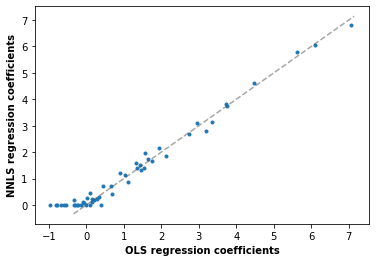

In [6]:
true_coef = 3 * np.random.randn(n_features)

true_coef[true_coef < 0] = 0
y = np.dot(X, true_coef)
y += 5 * np.random.normal(size=(n_samples, ))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5)

reg_nnls = LinearRegression(positive=True)
y_pred_nnls = reg_nnls.fit(X_train, y_train).predict(X_test)
r2_score_nnls = r2_score(y_test, y_pred_nnls)
print('NNLS R2 score: {}'.format(r2_score_nnls))

reg_ols = LinearRegression()
y_pred_ols = reg_ols.fit(X_train, y_train).predict(X_test)
r2_score_ols = r2_score(y_test, y_pred_ols)
print('OLS R2 score: {}'.format(r2_score_ols))

fig, ax = plt.subplots()
ax.plot(reg_ols.coef_, reg_nnls.coef_, linewidth=0, marker='.')
low_x, high_x = ax.get_xlim()
low_y, high_y = ax.get_ylim()
low = max(low_x, low_y)
high = min(high_x, high_y)
ax.plot([low, high], [low, high], ls='--', c='.3', alpha=.5)
ax.set_xlabel('OLS regression coefficients', fontweight='bold')
ax.set_ylabel('NNLS regression coefficients', fontweight='bold')
plt.show()